# Morts du Covid

## Sources authentiques de données

- COVID Data : https://epistat.wiv-isp.be/covid/
- COVID Mortality : https://epistat.sciensano.be/Data/COVID19BE_MORT.json

## Suggestions d'exercices

- Créer un graphique qui contient deux courbes de mortalité en fonction du sexe.
- Créer une fonction qui renvoie le nombre de morts pour une semaine donnée et dont la signature est `def get_death_number_for_week(week: int, year: int, data: list) -> int`
- Réaliser un graphique qui affiche le nombre de morts par semaine en 2020.

## Importer l'ensemble des données

In [1]:
### Importer les librairies nécessaires pour ce notebook
from matplotlib import pyplot as plt
from pprint import pprint
import calendar
import csv
import datetime
import json
import requests

In [2]:
### Charger les données à partir du web service JSON
death_records_response = requests.get("https://epistat.sciensano.be/Data/COVID19BE_MORT.json")
death_records = death_records_response.json()

In [3]:
### (Alternative) Charger les données à partir du fichier JSON
# f = open("matplotlib-covid.json", "r")
# death_records = json.load(f)
# f.close()

In [4]:
### (Alternative) Charger les données à partir du fichier CSV
#f = open("matplotlib-covid.csv", "r")
#death_records = [row for row in csv.DictReader(f)]
#f.close()

#### Convertir le champ string *DEATHS* en int
#for record in death_records:
#    record["DEATHS"] = int(record["DEATHS"])

In [5]:
### Imprimer les 5 derniers records
pprint(death_records[-5:])

[{'AGEGROUP': '75-84',
  'DATE': '2021-02-10',
  'DEATHS': 2,
  'REGION': 'Wallonia',
  'SEX': 'M'},
 {'AGEGROUP': '75-84',
  'DATE': '2021-02-10',
  'DEATHS': 3,
  'REGION': 'Wallonia',
  'SEX': 'F'},
 {'AGEGROUP': '85+',
  'DATE': '2021-02-10',
  'DEATHS': 1,
  'REGION': 'Wallonia',
  'SEX': 'M'},
 {'AGEGROUP': '45-64',
  'DATE': '2021-02-11',
  'DEATHS': 1,
  'REGION': 'Wallonia',
  'SEX': 'M'},
 {'AGEGROUP': '65-74',
  'DATE': '2021-02-11',
  'DEATHS': 1,
  'REGION': 'Wallonia',
  'SEX': 'F'}]


## Calculer le nombre total de morts

In [6]:
dead_number = sum([record["DEATHS"] for record in death_records])
print(f"Nombre total de morts : {dead_number}")

Nombre total de morts : 21551


## Calculer le nombre de morts du 15 janvier 2021

In [7]:
### Sélectionner les données du 15 janvier 2021
dead_2021_01_15 = [record for record in death_records if record["DATE"] == "2021-01-15"]
# pprint(dead_2021_01_15)

In [8]:
### Calculer le nombre de morts le 15 janvier 2021
dead_2021_01_15_sum = sum([item["DEATHS"] for item in dead_2021_01_15])
print(f"Le nombre de morts du Covid le 15 janvier 2021 est égal à {dead_2021_01_15_sum}.")

Le nombre de morts du Covid le 15 janvier 2021 est égal à 48.


## Créer une fonction qui renvoie le nombre de mort pour un jour donné 

In [9]:
def get_death_number_for_day(day: str, data: dict) -> int:
    deaths = sum([record["DEATHS"] for record in data if record.get("DATE") == day])
    return deaths

In [10]:
deaths_2020_12_25 = get_death_number_for_day("2020-12-25", death_records)
print(f"Nombre de mort le jour de Noël : {deaths_2020_12_25}")

Nombre de mort le jour de Noël : 67


## Créer une fonction qui renvoie le nombre de morts pour un jour et une région données

In [11]:
def get_death_number_for_day_and_region(day: str, region: str, data: list) -> int:
    deaths = sum([record["DEATHS"] for record in data
                  if record.get("REGION") == region and record.get("DATE") == day])
    return deaths

death_in_wallonia_2021_01_01 = get_death_number_for_day_and_region(
    "2021-01-01", "Wallonia", death_records
)
print(f"Nombre de morts en Wallonie le 1er janvier : {death_in_wallonia_2021_01_01}")

Nombre de morts en Wallonie le 1er janvier : 16


## Afficher un graphique du nombre de morts par jour du mois de janvier 2021

In [12]:
### Construire les jours du mois de janvier 2021
january_days = ["2021-01-" + f"{day:02}" for day in range(1, 32)]
# pprint(january_days)

In [13]:
### Mettre les valeurs initiales de morts par jour du mois de janvier à zéro.
january_deads = dict.fromkeys(january_days, 0)
# pprint(january_deads)

In [14]:
### Calculer le nombre de morts par jour du mois de janvier 2021
for record in death_records:
    rday = record["DATE"]
    if rday.startswith("2021-01-"):
        january_deads[rday] += record["DEATHS"]
# pprint(january_deads)

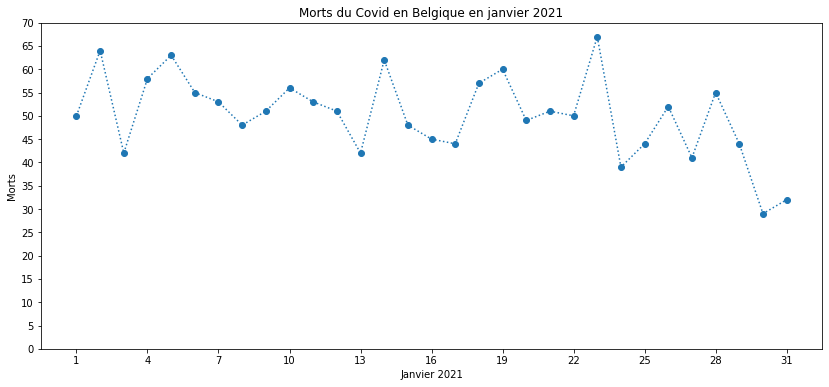

In [15]:
### Afficher un graphique du nombre de morts par jour pour le mois de janvier 2021
x = [int(day[-2:]) for day in january_deads.keys()]
y = january_deads.values()
plt.figure(figsize=(14, 6))
plt.plot(x, y, marker='o', linestyle = 'dotted');

plt.title("Morts du Covid en Belgique en janvier 2021")
plt.xlabel("Janvier 2021")
plt.xticks(range(1, 32, 3))
plt.yticks(range(0, 71, 5))
plt.ylabel("Morts");

## Créer une fonction qui renvoie le nombre de morts par semaine pour une année donnée

In [16]:
def get_deaths_per_week_for_year(year: int, data: list) -> dict:
    # Initialise à 0 le nombre de morts pour les 52 semaines de l'année
    deaths_per_week = dict.fromkeys(range(1, 54), 0)
    for record in data:
        record_iso_date = record["DATE"]
        record_date = datetime.date.fromisoformat(record_iso_date)
        if record_date.year == year:
            record_week = record_date.isocalendar()[1]
            deaths_per_week[record_week] += record["DEATHS"]
    return deaths_per_week

In [17]:
deaths_per_week_for_2020 = get_deaths_per_week_for_year(2020, death_records)
# pprint(deaths_per_week_for_2020)

### Afficher un graphique du nombre de morts par semaine pour l'année 2020

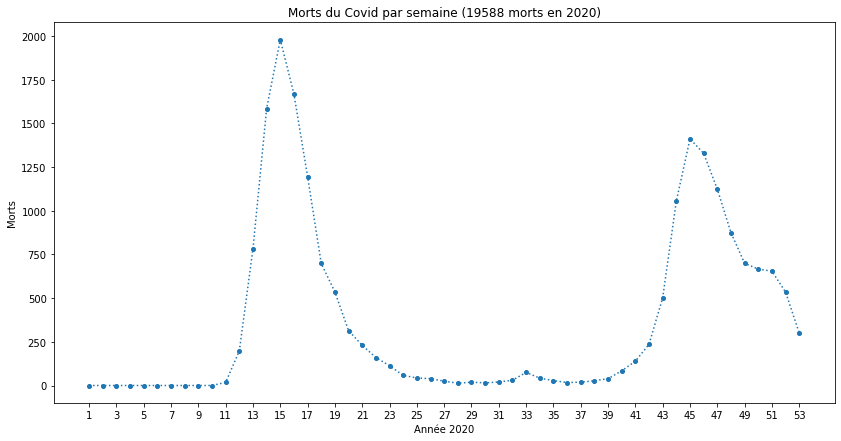

In [18]:
x = deaths_per_week_for_2020.keys()
y = deaths_per_week_for_2020.values()
total_deaths_in_2020 = sum(y)

plt.figure(figsize=(14, 7))
plt.plot(x, y, marker='o', markersize=4, linestyle = 'dotted');

plt.title(f"Morts du Covid par semaine ({total_deaths_in_2020} morts en 2020)")
plt.xlabel("Année 2020")
plt.xticks(range(1, 54, 2))
#plt.yticks(range(0, 71, 5))
plt.ylabel("Morts");

## Créer une fonction qui retourne le nombre de décès par tranche d'âge pour un mois donné

In [19]:
def get_death_number_by_age_for_month(month: int, year: int, data: list) -> dict:
    month_str = f"{year}-{month:02}"
    deaths_by_age = dict.fromkeys([
        "0-24", "25-44", "45-64", "65-74", "75-84", "85+", "OTHERS"
    ] ,0)
    for record in data:
        if record["DATE"].startswith(month_str):
            if "AGEGROUP" in record:
                deaths_by_age[record["AGEGROUP"]] += record["DEATHS"]
            else:
                deaths_by_age["OTHERS"] += record["DEATHS"]
    return deaths_by_age

deaths_in_2020_12 = get_death_number_by_age_for_month(12, 2020, death_records)
deaths_in_2021_01 = get_death_number_by_age_for_month(1, 2021, death_records)

print(f"Morts par âge en décembre 2020 : {deaths_in_2020_12}")
print(f"Morts par âge en janvier 2021 : {deaths_in_2021_01}")   

Morts par âge en décembre 2020 : {'0-24': 2, '25-44': 12, '45-64': 152, '65-74': 339, '75-84': 736, '85+': 1511, 'OTHERS': 2}
Morts par âge en janvier 2021 : {'0-24': 0, '25-44': 10, '45-64': 74, '65-74': 168, '75-84': 442, '85+': 859, 'OTHERS': 2}


## Afficher les diagrammes circulaires des proportions de décès par tranche d'âge des 9 derniers mois de 2020

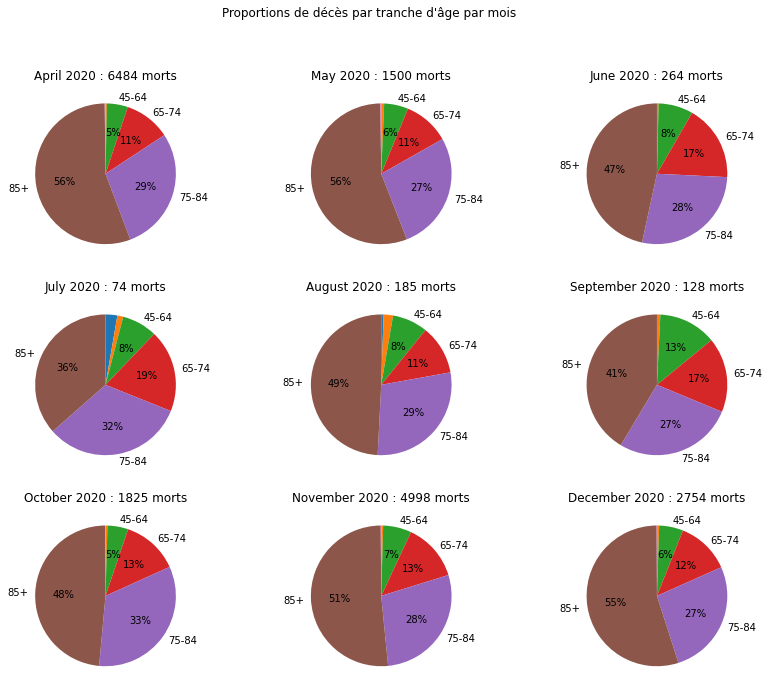

In [20]:
plt.figure(figsize=(14,11))
plt.suptitle("Proportions de décès par tranche d'âge par mois")
months = range(4, 13)
for index, month in enumerate(months, start=1):
    deaths_by_age = get_death_number_by_age_for_month(month, 2020, death_records)
    deaths = sum(deaths_by_age.values())
    # Supprimer les labels pour les sections de moins de 4%
    labels = [k if v > deaths/25 else "" for k, v in deaths_by_age.items()]
    numbers = deaths_by_age.values()
    plt.subplot(3, 3, index)
    plt.title(f"{calendar.month_name[month]} 2020 : {deaths} morts")
    plt.pie(
        numbers,
        labels=labels,
        # Supprimer l'affichage du pourcentage pour les sections de moins de 4%
        autopct=lambda pct : f"{pct:.0f}%" if pct > 4 else "",
        startangle=90,
        counterclock=False
    );